In [40]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import file, examine it's structure and content

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [26]:
# Check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Examine data for duplicates/nulls

In [24]:
print(f"There are {sum(df.duplicated())} duplicate values")

There are 0 duplicate values


- Data has no duplicates and looks to be well structured (without junk values)
- Data contains information about a customer's age, fitness level, education, income, marital status, etc
- Data also contains no nulls, so the CSV will be good to go after changing object types to category

In [34]:
df['Product'] = df.Product.astype('category')
df['Gender'] = df.Gender.astype('category')
df['MaritalStatus'] = df.MaritalStatus.astype('category')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [31]:
# Check the five number summary
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [29]:
# Check the median of numerical columns
df.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [28]:
# Check the mode of each value
df.mode()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,25,Male,16,Partnered,3,3,45480,85


### Initial Observations:
- Customers are primarily young adults (18 - 33)
- The majority have completed some college (bachelor's degree, specifically)
- Most are casual exercisers with above average fitness level


### Examine Basic Univariate Stats

In [47]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    
    
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

### Let's look at our numerical variables

### Age Observations

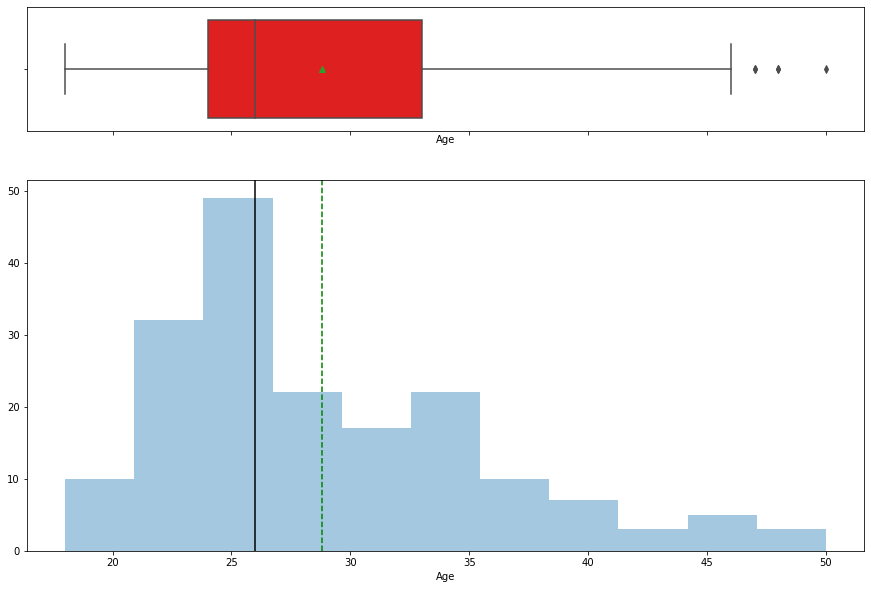

In [41]:
histogram_boxplot(df.Age)

Observations:
- Data distribution is skewed to the right
- The majority of customers are under 30
- Median age is about 26 whereas the mean is about 29
- Not a ton of outliers
- While customers are generally younger, there is a non-trivial amount of 40+ customers

### Education Observations

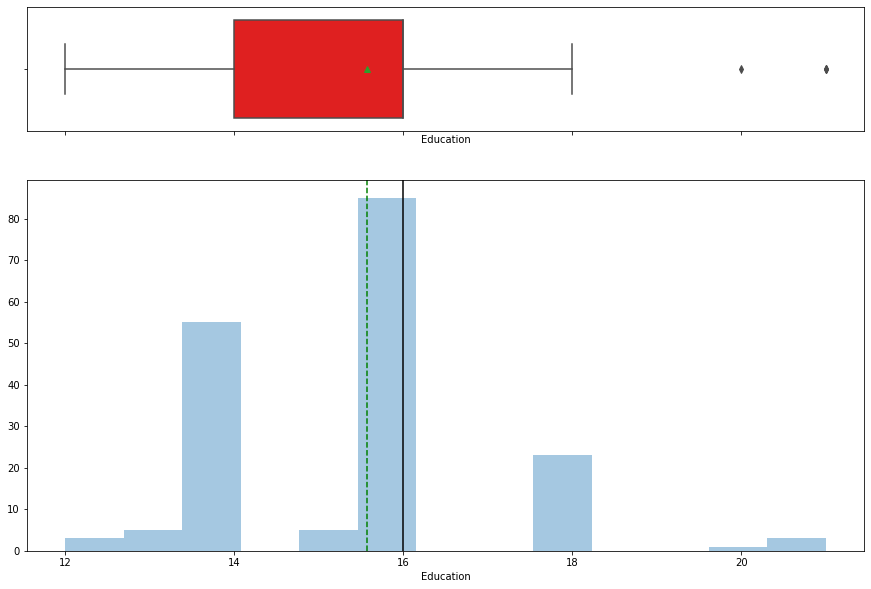

In [42]:
histogram_boxplot(df.Education)

Observations:
- Distribution is close to normal
- The majority of customers are college educated (bachelor's degree or above)
- Not very many outliers
- Effectively all customers have some level of college education

### Usage Observations

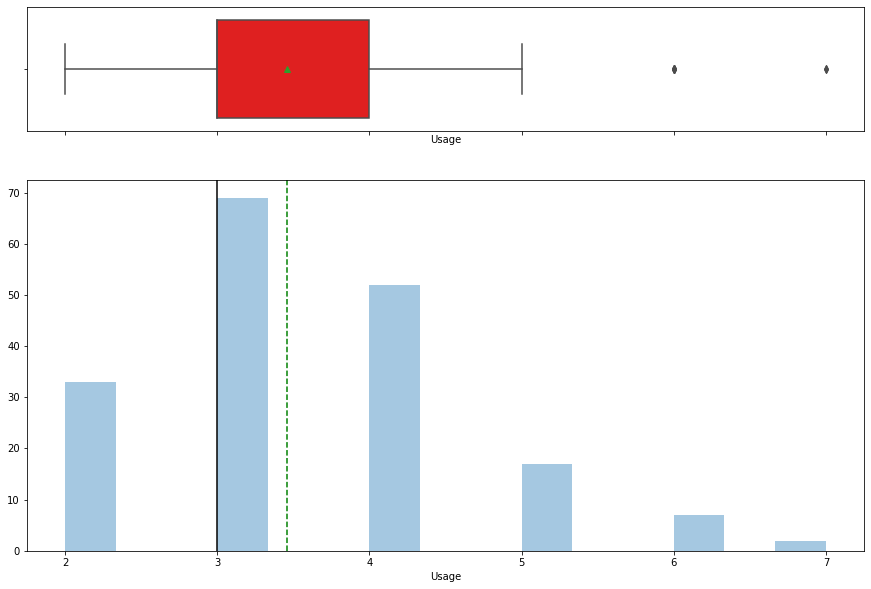

In [43]:
histogram_boxplot(df.Usage)

Observations:
- Distribution is right skewed
- The vast majority of customers intend to use the treadmill 2-4 times per week
- This suggests that the client base may be primarily casual fitness enthusiasts
- Only a few outliers of those who would use the products 6-7 days per week

### Fitness Observations

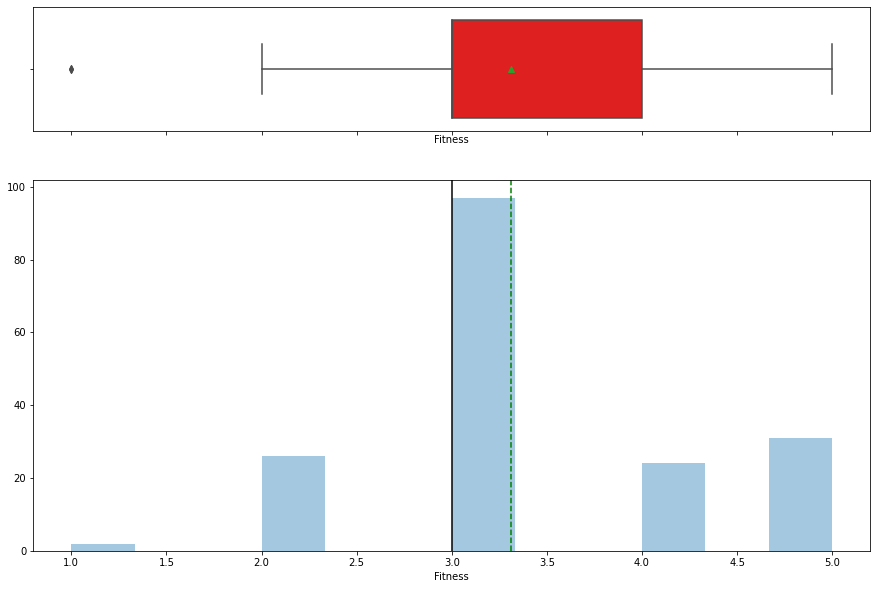

In [44]:
histogram_boxplot(df.Fitness)

Observations:
- Distribution is close to normal with a non significant number of outliers
- The vast majority of customers are either in above average shape or better
- This suggests that the product is not as popular with those looking to get in shape compared to those already in shape

### Income Observations

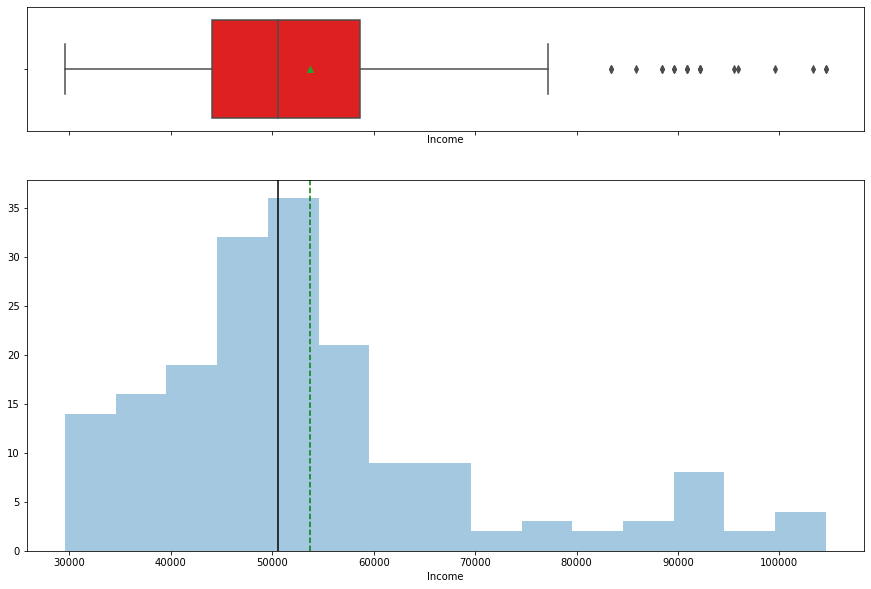

In [45]:
histogram_boxplot(df.Income)

Observations:
- Data is skewed to the right with a fair amount of outliers
- The median income is around 50,000 with an average slightly higher than that
- There is a pretty significant range of incomes, suggesting the products are popular with many types of customers

### Miles Observations

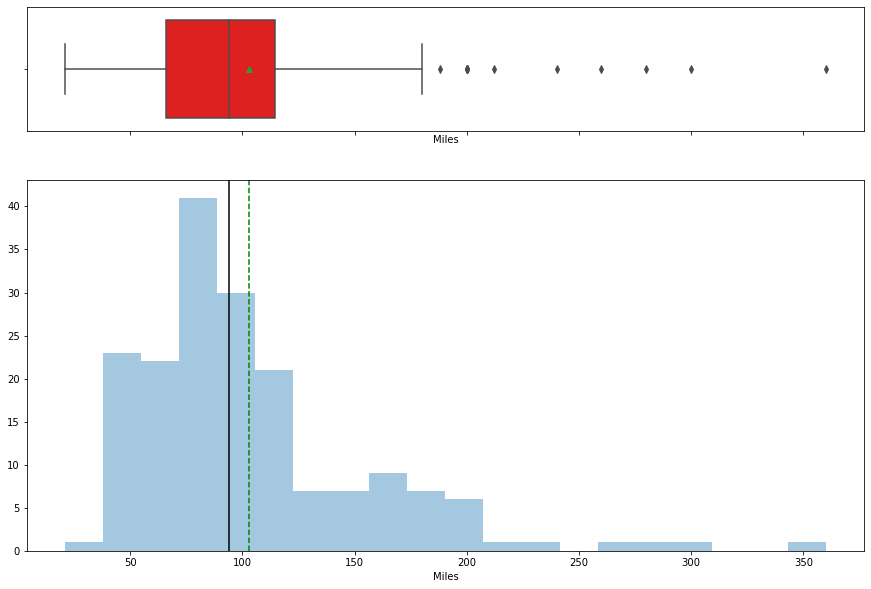

In [46]:
histogram_boxplot(df.Miles)

Observations:
- Data is skewed to the right with a fair amount of outliers
- Both the average and median value are very close to each other (around 100 miles)
- Because they are both around 100 miles, it indicates an intermediate fitness level
- This reinforces the notion that cutsomers are already in good shape and just looking to maintain themselves (running a fair amount, but nothing extreme)

### Let's look at our categorical variables

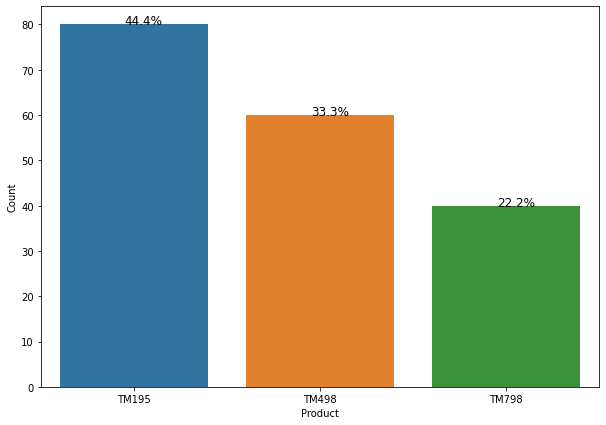

In [48]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Product'])
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,df['Product'])

Observations:
- The TM195 is the best seller with the TM489 and TM789 decreasing by 11.1% and 22.2%

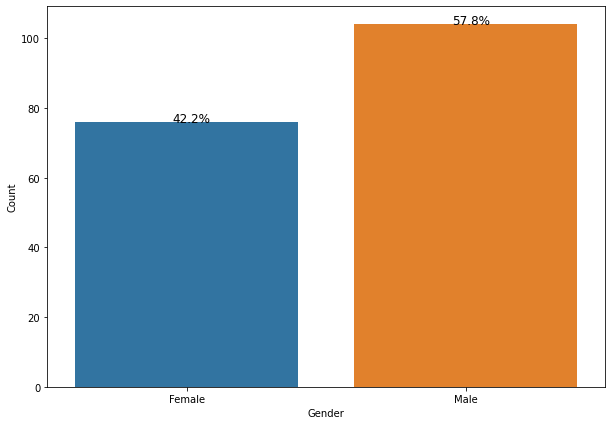

In [49]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
bar_perc(ax,df['Gender'])

Observations:
- A slight majority of customers are men

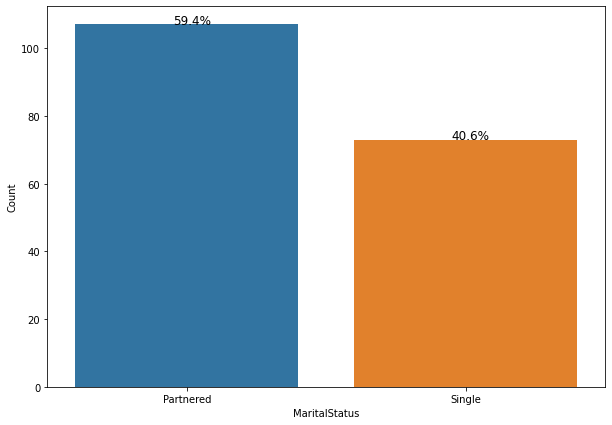

In [50]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['MaritalStatus'])
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
bar_perc(ax,df['MaritalStatus'])

Observations:
- A slight majority of customers 

### Let's look closer at some Bivariate analysis

In [32]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

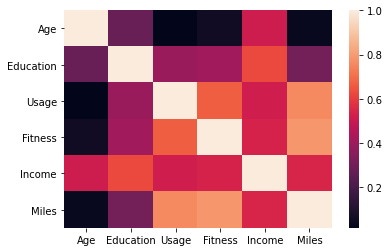

In [33]:
sns.heatmap(df.corr())